# 项目背景
在全球生产制造趋于自动化、智能化的背景下，绵羊产物例如羊奶、羊毛的收集也向着自动化方向发展。通过深度学习的方式区分绵羊种类，可以作为挤奶或剪毛的前置工序，原因在于不同种类的羊类由于体型和习性的关系，可能需要不同的挤奶或剪毛工序，做好绵羊种类的识别可以提高羊产品相关产线的针对性和适应性。利用传统视觉技术来对绵羊进行分类可能存在一定的的困难和问题，利用深度学习的方式可以得到改善或解决。

# 数据集介绍

该数据最初是Abu Jwade Sanabel等人的工作，该小组从澳大利亚的一个真实农场收集了数据。此外，这些数据是根据CC BY 4.0许可从网络上抓取的，并在此处显示。
在农场起草时记录了来自四个绵羊品种的绵羊。捕获绵羊的单个帧按品种分组。有一个用于对齐绵羊图像的主文件夹，其中有一个用于四个品种图像的文件夹。
您是否可以训练准确度超过95％的分类模型？

In [ ]:
# 持久化安装paddlex
!mkdir /home/aistudio/external-libraries
!pip install "paddlex<=2.0.0" -i https://mirror.baidu.com/pypi/simple -t /home/aistudio/external-libraries

In [ ]:
# 导入持久化库
import sys
sys.path.append('/home/aistudio/external-libraries')

In [ ]:
# 解压所挂载的数据集在同级目录下
!unzip -oq data/data108109/绵羊品种分类.zip -d work

In [ ]:
#替换空格为下划线
import os
 
image_dir   = "work/SheepFaceImages"

 
 
def delete_space(buff_dir):
    for files_name in os.listdir(buff_dir):
        if len(files_name.split(" ")) >1:
            os.rename(os.path.join(buff_dir,files_name),
                      os.path.join(buff_dir,files_name.replace(" ","_")))
            print(os.path.join(buff_dir,files_name.replace(" ","_")))
 
 
delete_space(image_dir)
file_list = os.listdir(image_dir)
for i in range(len(file_list)):
    file_list_path = (os.path.join(image_dir,file_list[i]))
    delete_space(file_list_path)


work/SheepFaceImages/White_Suffolk
work/SheepFaceImages/Poll_Dorset
work/SheepFaceImages/Poll_Dorset/000319_P.jpg
work/SheepFaceImages/Poll_Dorset/000144_P.jpg
work/SheepFaceImages/Poll_Dorset/000085_P.jpg
work/SheepFaceImages/Poll_Dorset/000115_P.jpg
work/SheepFaceImages/Poll_Dorset/000197_P.jpg
work/SheepFaceImages/Poll_Dorset/000291_P.jpg
work/SheepFaceImages/Poll_Dorset/000205_P.jpg
work/SheepFaceImages/Poll_Dorset/000051_P.jpg
work/SheepFaceImages/Poll_Dorset/000417_P.jpg
work/SheepFaceImages/Poll_Dorset/000172_P.jpg
work/SheepFaceImages/Poll_Dorset/000257_P.jpg
work/SheepFaceImages/Poll_Dorset/000325_P.jpg
work/SheepFaceImages/Poll_Dorset/000268_P.jpg
work/SheepFaceImages/Poll_Dorset/000342_P.jpg
work/SheepFaceImages/Poll_Dorset/000117_P.jpg
work/SheepFaceImages/Poll_Dorset/000383_P.jpg
work/SheepFaceImages/Poll_Dorset/000359_P.jpg
work/SheepFaceImages/Poll_Dorset/000304_P.jpg
work/SheepFaceImages/Poll_Dorset/000177_P.jpg
work/SheepFaceImages/Poll_Dorset/000375_P.jpg
work/SheepFa

In [ ]:
# 查看数据集的目录结构
!tree work/SheepFaceImages -d

work/SheepFaceImages
├── Marino
├── Poll_Dorset
├── Suffolk
└── White_Suffolk

4 directories


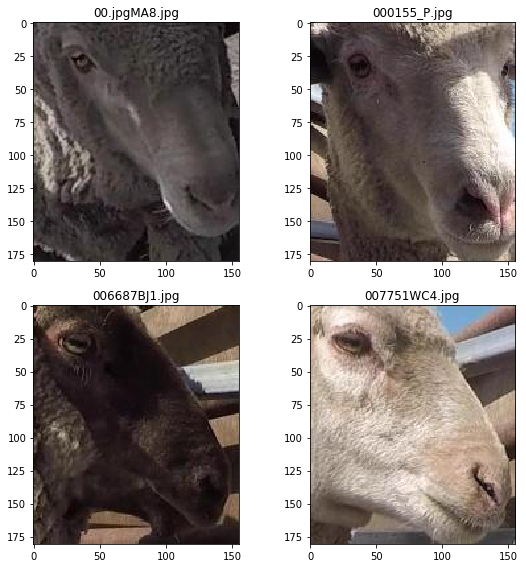

In [ ]:
# 数据集抽样可视化

import cv2,os
import matplotlib.pyplot as plt

%matplotlib inline
# 在各个类别中各选取一张图像
image_path_list = ['work/SheepFaceImages/Marino/00.jpgMA8.jpg', \
                   'work/SheepFaceImages/Poll_Dorset/000155_P.jpg', \
                   'work/SheepFaceImages/Suffolk/006687BJ1.jpg', \
                   'work/SheepFaceImages/White_Suffolk/007751WC4.jpg']
# 设置显示图片宽高，单位英寸
plt.figure(figsize=(8, 8))
for i in range(len(image_path_list)):
    plt.subplot(len(image_path_list)/2, 2, i+1)
    plt.title(os.path.split(image_path_list[i])[1])
    plt.imshow(cv2.imread(image_path_list[i])[:, :, ::-1])# RGB显示
# 图像自适应
plt.tight_layout()
plt.show()

In [ ]:
# 计算图像数据整体均值和方差
import glob,cv2
import numpy as np


def get_mean_std(image_path_list):
    print('Total images:', len(image_path_list))
    max_val, min_val = np.zeros(3), np.ones(3) * 255
    mean, std = np.zeros(3), np.zeros(3)
    for image_path in image_path_list:
        image = cv2.imread(image_path)
        for c in range(3):
            mean[c] += image[:, :, c].mean()
            std[c] += image[:, :, c].std()
            max_val[c] = max(max_val[c], image[:, :, c].max())
            min_val[c] = min(min_val[c], image[:, :, c].min())

    mean /= len(image_path_list)
    std /= len(image_path_list)

    mean /= max_val - min_val
    std /= max_val - min_val

    return mean, std


mean, std = get_mean_std(glob.glob('work/SheepFaceImages/Marino/*.jpg'))
print('mean:', mean)
print('std:', std)

Total images: 420
mean: [0.39604362 0.42379167 0.46941565]
std: [0.18864467 0.20002706 0.20721888]


**创建csv文件**

In [ ]:
# 创建csv文件

import os,random,csv

def load_csv(root, filename, name2label):
    # 从csv文件返回images,labels列表
    # input_path:数据集根目录，filename:csv文件名， name2label:类别名编码表
    if not os.path.exists(os.path.join(root, filename)):
        # 如果csv文件不存在，则创建
        images = []
        for name in name2label.keys(): # 通过键遍历所有子目录，获得所有的图片
            # 只考虑后缀为png,jpg,jpeg,bmp的图片
            images += glob.glob(os.path.join(root, name, '*.png'))
            images += glob.glob(os.path.join(root, name, '*.jpg'))
            images += glob.glob(os.path.join(root, name, '*.jpeg'))
            images += glob.glob(os.path.join(root, name, '*.bmp'))
        # 打印数据集信息
        print(len(images), images) # 一个类别的所有图片文件
        #random.shuffle(images) # 随机打散顺序
        # 创建csv文件，并存储图片路径及其label信息
        with open(os.path.join(root, filename), mode='w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['id','class_num'])
            for img in images:  
                name = img.split(os.sep)[-2]
                label = name2label[name]
                writer.writerow([img, label])
            print('written into csv file:', filename)

    # 此时已经有csv文件，直接读取
    # images, labels = [], []
    # with open(os.path.join(root, filename)) as f:
    #     reader = csv.reader(f)
    #     for row in reader:
    #         img, label = row
    #         label = int(label)
    #         images.append(img)
    #         labels.append(label) 
            
    # # 返回图片路径list和标签list

    # return images, labels

name2label = {}  

root = 'work/SheepFaceImages'

# 遍历根目录下的子文件夹，并排序，保证映射关系固定
for name in sorted(os.listdir(os.path.join(root))):
    # 跳过非文件夹
    if not os.path.isdir(os.path.join(root, name)):
        continue
    elif name == '.ipynb_checkpoints':
        continue
    # 给每个类别编码一个数字
    name2label[name] = len(name2label.keys())

load_csv(root, 'images.csv', name2label)


1680 ['work/SheepFaceImages/Marino/08.jpgMB7.jpg', 'work/SheepFaceImages/Marino/014339Mv4.jpg', 'work/SheepFaceImages/Marino/009630MN4.jpg', 'work/SheepFaceImages/Marino/000707ME4.jpg', 'work/SheepFaceImages/Marino/002412MB5.jpg', 'work/SheepFaceImages/Marino/016634MZ4.jpg', 'work/SheepFaceImages/Marino/016713MZ4.jpg', 'work/SheepFaceImages/Marino/019272MG3.jpg', 'work/SheepFaceImages/Marino/001390MD2.jpg', 'work/SheepFaceImages/Marino/71.jpgMA8.jpg', 'work/SheepFaceImages/Marino/006736MH6.jpg', 'work/SheepFaceImages/Marino/000933MA5.jpg', 'work/SheepFaceImages/Marino/004612MI4.jpg', 'work/SheepFaceImages/Marino/001024MA5.jpg', 'work/SheepFaceImages/Marino/008177MM4.jpg', 'work/SheepFaceImages/Marino/002365MB5.jpg', 'work/SheepFaceImages/Marino/001194MA5.jpg', 'work/SheepFaceImages/Marino/001204MA5.jpg', 'work/SheepFaceImages/Marino/001761MF1.jpg', 'work/SheepFaceImages/Marino/000417MA2.jpg', 'work/SheepFaceImages/Marino/007195ML4.jpg', 'work/SheepFaceImages/Marino/013956MV4.jpg', 'wor

**划分数据集**

In [ ]:
# 划分数据集
import pandas as pd
from sklearn.utils import shuffle
train_images = pd.read_csv('work/SheepFaceImages/images.csv', usecols=['id','class_num'])
# labelshuffling

def labelShuffling(dataFrame, groupByName = 'class_num'):

    groupDataFrame = dataFrame.groupby(by=[groupByName])
    labels = groupDataFrame.size()
    print("length of label is ", len(labels))
    maxNum = max(labels)
    lst = pd.DataFrame()
    for i in range(len(labels)):
        print("Processing label  :", i)
        tmpGroupBy = groupDataFrame.get_group(i)
        createdShuffleLabels = np.random.permutation(np.array(range(maxNum))) % labels[i]
        print("Num of the label is : ", labels[i])
        lst=lst.append(tmpGroupBy.iloc[createdShuffleLabels], ignore_index=True)
        print("Done")
    # lst.to_csv('test1.csv', index=False)
    return lst

# 划分训练集和校验集
all_size = len(train_images)
print(all_size)
train_size = int(all_size * 0.8)
train_image_list = train_images[:train_size]
val_image_list = train_images[train_size:]

# df = labelShuffling(train_image_list)
# df = shuffle(df)

# train_image_path_list = df['id'].values
# label_list = df['class_num'].values
# label_list = paddle.to_tensor(label_list, dtype='int64')
# train_label_list = paddle.nn.functional.one_hot(label_list, num_classes=4)

# val_image_path_list = val_image_list['id'].values
# val_label_list = val_image_list['class_num'].values
# val_label_list = paddle.to_tensor(val_label_list, dtype='int64')
# val_label_list = paddle.nn.functional.one_hot(val_label_list, num_classes=4)



1680


**转换到txt文档**

In [ ]:
#标签列表
if os.path.isfile('label.txt'):
    os.remove('label.txt')
file = open('label.txt','w'); 
for line in name2label.keys():
    file.write(str(line)+'\n')
file.close();
#train文件列表
if os.path.isfile('train.txt'):
    os.remove('train.txt')
file = open('train.txt','w')
for line in train_image_list.values:
    file.write(line[0]+' '+str(line[1])+'\n')
file.close()
#val文件列表
if os.path.isfile('val.txt'):
    os.remove('val.txt')
file = open('val.txt','w')
for line in val_image_list.values:
    file.write(line[0]+' '+str(line[1])+'\n')
file.close()


# 模型训练

**构建dataset**

In [ ]:
from paddlex import transforms as T
import paddlex as pdx

train_transforms = T.Compose(
    [T.RandomCrop(crop_size=224), T.RandomHorizontalFlip(), T.Normalize()])

val_transforms = T.Compose([
    T.ResizeByShort(short_size=256), T.CenterCrop(crop_size=224), T.Normalize()
])

train_dataset = pdx.datasets.ImageNet(
    data_dir='./',
    file_list='train.txt',
    label_list='label.txt',
    transforms=train_transforms,
    shuffle=True)
val_dataset = pdx.datasets.ImageNet(
    data_dir='./',
    file_list='val.txt',
    label_list='label.txt',
    transforms=val_transforms)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/distributed/parallel.py:136: UserWarning: Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything.
  "Currently not a parallel execution environment, `paddle.distributed.init_parallel_env` will not do anything."
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/parl/remote/communication.py:38: DeprecationWarning: 'pyarrow.default_serialization_context' is deprecated as of 2.0.0 and will be removed in a future version. Use pickle or the pyarrow IPC functionality instead.
  context = pyarrow.default_serialization_context()
/home/aistudio/external-libraries/paddleslim/common/analyze_helper.py:22: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* s

[02-24 09:06:44 MainThread @utils.py:79] WRN paddlepaddle version: 2.2.2. The dynamic graph version of PARL is under development, not fully tested and supported
2022-02-24 09:06:46 [INFO]	Starting to read file list from dataset...
2022-02-24 09:06:46 [INFO]	1344 samples in file train.txt
2022-02-24 09:06:46 [INFO]	Starting to read file list from dataset...
2022-02-24 09:06:46 [INFO]	336 samples in file val.txt


**模型训练

In [13]:
# 模型封装

num_classes = len(train_dataset.labels)
model = pdx.cls.MobileNetV2(num_classes=num_classes)


# 模型训练与评估
model.train(num_epochs=100,
            train_dataset=train_dataset,
            train_batch_size=64,
            eval_dataset=val_dataset,
            #lr_decay_epochs=[30, 60, 90],
            save_interval_epochs=1,
            pretrain_weights='IMAGENET',
            learning_rate=0.0003,
            save_dir='output/mobilenetv2',
            use_vdl=True)

2022-02-24 09:07:40 [INFO]	Downloading MobileNetV2_pretrained.pdparams from https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/MobileNetV2_pretrained.pdparams


100%|██████████| 20851/20851 [00:00<00:00, 23648.22KB/s]


2022-02-24 09:07:41 [INFO]	Loading pretrained model from output/mobilenetv2/pretrain/MobileNetV2_pretrained.pdparams
2022-02-24 09:07:41 [WARNING]	[SKIP] Shape of pretrained params out.weight doesn't match.(Pretrained: [1280, 1000], Actual: [1280, 4])
2022-02-24 09:07:41 [WARNING]	[SKIP] Shape of pretrained params out.bias doesn't match.(Pretrained: [1000], Actual: [4])
2022-02-24 09:07:41 [INFO]	There are 265/267 variables loaded into MobileNetV2.
2022-02-24 09:07:43 [INFO]	[TRAIN] Epoch=1/100, Step=10/21, loss=1.344146, acc1=0.453125, acc4=1.000000, lr=0.000300, time_each_step=0.21s, eta=0:7:23
2022-02-24 09:07:45 [INFO]	[TRAIN] Epoch=1/100, Step=20/21, loss=1.182520, acc1=0.484375, acc4=1.000000, lr=0.000300, time_each_step=0.17s, eta=0:5:52
2022-02-24 09:07:45 [INFO]	[TRAIN] Epoch 1 finished, loss=1.3243601, acc1=0.4107143, acc4=1.0 .
2022-02-24 09:07:45 [INFO]	Start to evaluate(total_samples=336, total_steps=6)...
2022-02-24 09:07:47 [INFO]	[EVAL] Finished, Epoch=1, acc1=0.000000,

# 结果预测

In [14]:
import paddlex as pdx
from paddlex import transforms as T

test_transforms = T.Compose(
    [T.ResizeByShort(short_size=256), T.CenterCrop(crop_size=224), T.Normalize()])

model = pdx.load_model('output/mobilenetv2/best_model')
image_name = 'work/SheepFaceImages/Poll_Dorset/000363_P.jpg'
result = model.predict(image_name,test_transforms)
print("Predict Result:", result)

2022-02-24 09:18:31 [INFO]	Model[MobileNetV2] loaded.
Predict Result: [{'category_id': 1, 'category': 'Poll_Dorset', 'score': 0.9595675}]


# 总结
+ paddle作为一款国产深度学习框架，对比TF、pytouch等其他框架来说，资料相对好找，作为入门Deep Learning是一个很好的选择。

# 个人主页
+ [CSDN](https://blog.csdn.net/bblood307?type=blog)
+ [github](https://github.com/bbloodtech)
+ [gitee](https://gitee.com/bbloodtech)